In [1]:
from tensorflow.keras.datasets import cifar10

# CIFAR-10データを読み込む
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [2]:
# 前処理を行う。
from tensorflow.keras import utils

# 訓練データのピクセル値を0～1の範囲に変換。
X_train = X_train.astype('float32')
X_train /= 255.0
# テストデータのピクセル値を0～1の範囲に変換。
X_test = X_test.astype('float32')
X_test /= 255.0

# 正解ラベルを10クラスのワンホット表現に変換。
classes = 10
Y_train = utils.to_categorical(y_train, classes)
Y_test = utils.to_categorical(y_test, classes)

In [3]:
# 第1層：畳み込み層1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# CNNを構築
model = Sequential()

# （第1層）畳み込み層1
model.add(
    Conv2D(
        filters=32,                # フィルターの数は32
        kernel_size=(3, 3),        # 3×3のフィルターを使用
        input_shape=(32, 32, 3),   # 入力データの形状
        padding='same',            # ゼロパディングを行う
        activation='relu'          # 活性化関数はReLU
        ))

In [4]:
# （第2層）畳み込み層2
model.add(
    Conv2D(
        filters=32,                # フィルターの数は32
        kernel_size=(3, 3),        # 3×3のフィルターを使用
        padding='same',            # ゼロパディングを行う
        activation='relu'          # 活性化関数はReLU
        ))

In [5]:
# （第3層）プーリング層1：ウィンドウサイズは2×2
from tensorflow.keras.layers import MaxPooling2D, Dropout

model.add(
    MaxPooling2D(pool_size=(2, 2))
)

# ドロップアウトは25％
model.add(Dropout(0.5))

In [6]:
# （第4層）畳み込み層3
model.add(
    Conv2D(filters=64,             # フィルターの数は64
           kernel_size=(3, 3),     # 3×3のフィルターを使用
           padding='same',
           activation='relu'       # 活性化関数はReLU
           ))

In [7]:
# （第5層）畳み込み層4
model.add(
    Conv2D(filters=64,             # フィルターの数は64
           kernel_size=(3, 3),     # 3×3のフィルターを使用
           padding='same',         # ゼロパディングを行う
           activation='relu'       # 活性化関数はReLU
           ))

In [8]:
# （第6層）プーリング層2：ウィンドウサイズは2×2
model.add(
    MaxPooling2D(
        pool_size=(2, 2)
    ))

# ドロップアウトは25％
model.add(Dropout(0.5))

In [9]:
# Flatten層　4階テンソルから2階テンソルに変換
from tensorflow.keras.layers import Flatten

model.add(Flatten())

In [10]:
# （第7層）全結合層
from tensorflow.keras.layers import Dense

model.add(
    Dense(512,                     # ニューロン数は512
          activation='relu'))      # 活性化関数はReLU
          

# ドロップアウトは50％
model.add(Dropout(0.5))

In [11]:
# （第8層）出力層
model.add(
    Dense(classes,                 # 出力層のニューロン数はclasses
          activation='softmax'))   # 活性化関数はソフトマックス

In [12]:
# Sequentialオブジェクトのコンパイル
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy', # 損失関数は交差エントロピー誤差
    optimizer=Adam(),                # 最適化をAdamアルゴリズムで行う
    metrics=['accuracy']             # 学習評価として正解率を指定
    )

In [13]:
# モデルのサマリを表示
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [14]:
# 学習を行う

batch_size = 64 # ミニバッチのサイズ
epochs = 30    # 学習回数

history = model.fit(X_train,               # 訓練データ
                    Y_train,               # 正解ラベル 
                    batch_size=batch_size, # 勾配計算に用いるミニバッチの数 
                    epochs=epochs,         # 学習を繰り返す回数
                    verbose=1,             # 学習の進捗状況を出力する
                    validation_data=(
                        X_test, Y_test     # テストデータの指定
                    ))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 180s 4ms/sample - loss: 1.5947 - accuracy: 0.4119 - val_loss: 1.2328 - val_accuracy: 0.5599
Epoch 2/30
50000/50000 [==============================] - 180s 4ms/sample - loss: 1.2307 - accuracy: 0.5597 - val_loss: 1.0809 - val_accuracy: 0.6157
Epoch 3/30
50000/50000 [==============================] - 179s 4ms/sample - loss: 1.0651 - accuracy: 0.6215 - val_loss: 0.8863 - val_accuracy: 0.6906
Epoch 4/30
50000/50000 [==============================] - 179s 4ms/sample - loss: 0.9655 - accuracy: 0.6603 - val_loss: 0.8700 - val_accuracy: 0.6987
Epoch 5/30
50000/50000 [==============================] - 179s 4ms/sample - loss: 0.9034 - accuracy: 0.6816 - val_loss: 0.8087 - val_accuracy: 0.7153
Epoch 6/30
50000/50000 [==============================] - 180s 4ms/sample - loss: 0.8608 - accuracy: 0.6975 - val_loss: 0.7386 - val_accuracy: 0.7443
Epoch 7/30
50000/50000 [==========================

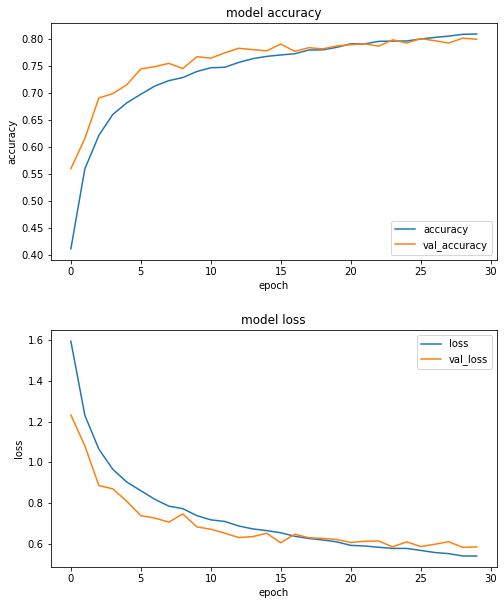

In [15]:
# 学習過程をグラフにする

import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    plt.ﬁgure(ﬁgsize=(8, 10))
    plt.subplots_adjust(hspace=0.3)
    # 精度の履歴をプロット
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'],"-",label="accuracy")
    plt.plot(history.history['val_accuracy'],"-",label="val_accuracy")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")

    # 損失の履歴をプロット
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'],"-",label="loss",)
    plt.plot(history.history['val_loss'],"-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    
# 学習の過程をグラフにする
plot_history(history)